In [22]:
#Importing libraries
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# Load Datasets

In [43]:
data=pd.read_csv("Practice.csv")

In [44]:
data.head()

customerID  Region  gender  SeniorCitizen Partner Dependents  tenure  \
0  7590-VHVEG  France  Female              0     Yes         No       1   
1  5575-GNVDE  France    Male              0      No         No      34   
2  3668-QPYBK  France    Male              0      No         No       2   
3  7795-CFOCW  France    Male              0      No         No      45   
4  9237-HQITU  France  Female              0      No         No       2   

  PhoneService     MultipleLines InternetService  ... DeviceProtection  \
0           No  No phone service             DSL  ...               No   
1          Yes                No             DSL  ...              Yes   
2          Yes                No             DSL  ...               No   
3           No  No phone service             DSL  ...              Yes   
4          Yes                No     Fiber optic  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges TotalCharges  Churn  
0           Electronic check          29.85        29.85     No  
1               Mailed check          56.95       1889.5     No  
2               Mailed check          53.85       108.15    Yes  
3  Bank transfer (automatic)          42.30      1840.75     No  
4           Electronic check          70.70       151.65    Yes  

[5 rows x 22 columns]

# Data Cleansing

### Check Data Types

In [45]:
data.dtypes

customerID           object
Region               object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Check Missing Value

In [47]:
data.isnull().sum()

customerID          0
Region              0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [48]:
data["TotalCharges"]=data["TotalCharges"].replace(" ",np.nan)

In [49]:
data["TotalCharges"]=pd.to_numeric(data["TotalCharges"])

In [50]:
data.isnull().sum()

customerID           0
Region               0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Impute Missing value

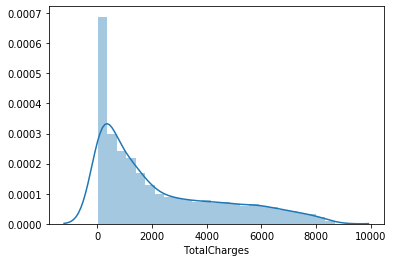

In [51]:
sns.distplot(data["TotalCharges"])

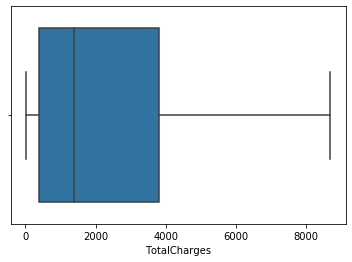

In [52]:
sns.boxplot(data["TotalCharges"])

In [53]:
fill=data["TotalCharges"].mean()
data["TotalCharges"]=data["TotalCharges"].fillna(fill)

In [54]:
data.isnull().sum()

customerID          0
Region              0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Outlier Detection

In [55]:
def outlier(sample):
    Q1=sample.quantile(0.25)
    Q3=sample.quantile(0.75)
    IQR=Q3-Q1
    lower_range = Q1 -(1.5 * IQR)
    upper_range = Q3 +(1.5 * IQR)
    number_outlier=len(sample[sample>upper_range])+len(sample[sample<lower_range])
    print("Number of Outlier {}".format(number_outlier))
    if number_outlier>0:
        print("Outlier observation row:")
    else:
        pass
    for i in range(len(sample)):
        if sample[i]<lower_range or sample[i]>upper_range:
            print(i)
        else:
            pass

In [56]:
outlier(data["tenure"])

Number of Outlier 0


In [57]:
outlier(data["MonthlyCharges"])

Number of Outlier 0


In [58]:
outlier(data["TotalCharges"])

Number of Outlier 0


# Feature Enginering and EDA

In [59]:
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    data[i]  = data[i].replace({'No internet service' : 'No'})

In [60]:
#Tenure to categorical column
def tenure_lab(data) :
    
    if data["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (data["tenure"] > 12) & (data["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (data["tenure"] > 24) & (data["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (data["tenure"] > 48) & (data["tenure"] <= 60) :
        return "Tenure_48-60"
    elif data["tenure"] > 60 :
        return "Tenure_gt_60"
data["tenure_group"] = data.apply(lambda data:tenure_lab(data),
                                      axis = 1)

In [23]:
#labels
lab = data["Churn"].value_counts().keys().tolist()
#values
val = data["Churn"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer attrition in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

gbr = [trace]
fig = go.Figure(data = gbr,layout = layout)
py.iplot(fig)

In [61]:
#Separating churn and non churn customers
churn     = data[data["Churn"] == "Yes"]
not_churn = data[data["Churn"] == "No"]

#Separating catagorical and numerical columns
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = data.nunique()[data.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in data.columns if x not in cat_cols + target_col + Id_col]

In [30]:
#function  for pie plot for customer attrition types
def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    gbr = [trace1,trace2]
    fig  = go.Figure(data = gbr,layout = layout)
    py.iplot(fig)


#function  for histogram for customer attrition types
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    gbr = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=gbr,layout=layout)
    
    py.iplot(fig)
    
#function  for scatter plot matrix  for numerical columns in data
def scatter_matrix(df)  :
    
    df  = df.sort_values(by = "Churn" ,ascending = True)
    classes = df["Churn"].unique().tolist()
    classes
    
    class_code  = {classes[k] : k for k in range(2)}
    class_code

    color_vals = [class_code[cl] for cl in df["Churn"]]
    color_vals

    pl_colorscale = "Portland"

    pl_colorscale

    text = [df.loc[k,"Churn"] for k in range(len(df))]
    text

    trace = go.Splom(dimensions = [dict(label  = "tenure",
                                       values = df["tenure"]),
                                  dict(label  = 'MonthlyCharges',
                                       values = df['MonthlyCharges']),
                                  dict(label  = 'TotalCharges',
                                       values = df['TotalCharges'])],
                     text = text,
                     marker = dict(color = color_vals,
                                   colorscale = pl_colorscale,
                                   size = 3,
                                   showscale = False,
                                   line = dict(width = .1,
                                               color='rgb(230,230,230)'
                                              )
                                  )
                    )
    axis = dict(showline  = True,
                zeroline  = False,
                gridcolor = "#fff",
                ticklen   = 4
               )
    
    layout = go.Layout(dict(title  = 
                            "Scatter plot matrix for Numerical columns for customer attrition",
                            autosize = False,
                            height = 800,
                            width  = 800,
                            dragmode = "select",
                            hovermode = "closest",
                            plot_bgcolor  = 'rgba(240,240,240, 0.95)',
                            xaxis1 = dict(axis),
                            yaxis1 = dict(axis),
                            xaxis2 = dict(axis),
                            yaxis2 = dict(axis),
                            xaxis3 = dict(axis),
                            yaxis3 = dict(axis),
                           )
                      )
    gbr   = [trace]
    fig = go.Figure(data = gbr,layout = layout )
    py.iplot(fig)

#for all categorical columns plot pie
for i in cat_cols :
    plot_pie(i)

#for all categorical columns plot histogram    
for i in num_cols :
    histogram(i)

#scatter plot matrix
scatter_matrix(data)

### Customer attrition in tenure groups

In [29]:
#cusomer attrition in tenure groups
tg_ch  =  churn["tenure_group"].value_counts().reset_index()
tg_ch.columns  = ["tenure_group","count"]
tg_nch =  not_churn["tenure_group"].value_counts().reset_index()
tg_nch.columns = ["tenure_group","count"]

#bar - churn
trace1 = go.Bar(x = tg_ch["tenure_group"]  , y = tg_ch["count"],
                name = "Churn Customers",
                marker = dict(line = dict(width = .5,color = "black")),
                opacity = .9)

#bar - not churn
trace2 = go.Bar(x = tg_nch["tenure_group"] , y = tg_nch["count"],
                name = "Non Churn Customers",
                marker = dict(line = dict(width = .5,color = "black")),
                opacity = .9)

layout = go.Layout(dict(title = "Customer attrition in tenure groups",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "tenure group",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "count",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                       )
                  )
gbr = [trace1,trace2]
fig  = go.Figure(data=gbr,layout=layout)
py.iplot(fig)

### Monthly Charges and Total Charges by Tenure and Churn groups

In [31]:
data[['MonthlyCharges', 'TotalCharges','tenure',"tenure_group"]]

#scatter plot monthly charges & total charges by tenure group

def plot_tenure_scatter(tenure_group,color) :
    tracer = go.Scatter(x = data[data["tenure_group"] == tenure_group]["MonthlyCharges"],
                        y = data[data["tenure_group"] == tenure_group]["TotalCharges"],
                        mode = "markers",marker = dict(line = dict(color = "black",
                                                                   width = .2),
                                                       size = 4 , color = color,
                                                       symbol = "diamond-dot",
                                                      ),
                        name = tenure_group,
                        opacity = .9
                       )
    return tracer

#scatter plot monthly charges & total charges by churn group
def plot_churncharges_scatter(churn,color) :
    tracer = go.Scatter(x = data[data["Churn"] == churn]["MonthlyCharges"],
                        y = data[data["Churn"] == churn]["TotalCharges"],
                        mode = "markers",marker = dict(line = dict(color = "black",
                                                                   width = .2),
                                                       size = 4 , color = color,
                                                       symbol = "diamond-dot",
                                                      ),
                        name = "Churn - " + churn,
                        opacity = .9
                       )
    return tracer

trace1 = plot_tenure_scatter("Tenure_0-12","#FF3300")
trace2 = plot_tenure_scatter("Tenure_12-24","#6666FF")
trace3 = plot_tenure_scatter("Tenure_24-48","#99FF00")
trace4 = plot_tenure_scatter("Tenure_48-60","#996600")
trace5 = plot_tenure_scatter("Tenure_gt_60","grey")
trace6 = plot_churncharges_scatter("Yes","red")
trace7 = plot_churncharges_scatter("No","blue")

gbr1   = [trace1,trace2,trace3,trace4,trace5] 
gbr2   = [trace7,trace6]

#layout
def layout_title(title) :
    layout = go.Layout(dict(title = title,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "Monthly charges",
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "Total Charges",
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            height = 600
                           )
                      )
    return layout

layout1  = layout_title("Monthly Charges & Total Charges by Tenure group")
layout2  = layout_title("Monthly Charges & Total Charges by Churn group")
fig1 = go.Figure(data = gbr1,layout = layout1)
fig2 = go.Figure(data = gbr2,layout = layout2)
py.iplot(fig1)
py.iplot(fig2)

### Average Charges by tenure groups

In [32]:
avg_tgc = data.groupby(["tenure_group","Churn"])[["MonthlyCharges",
                                                    "TotalCharges"]].mean().reset_index()

#function for tracing 
def mean_charges(column,aggregate) :
    tracer = go.Bar(x = avg_tgc[avg_tgc["Churn"] == aggregate]["tenure_group"],
                    y = avg_tgc[avg_tgc["Churn"] == aggregate][column],
                    name = aggregate,marker = dict(line = dict(width = 1)),
                    text = "Churn"
                   )
    return tracer

#function for layout
def layout_plot(title,xaxis_lab,yaxis_lab) :
    layout = go.Layout(dict(title = title,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = xaxis_lab,
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = yaxis_lab,
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                           )
                      )
    return layout
    

#plot1 - mean monthly charges by tenure groups
trace1  = mean_charges("MonthlyCharges","Yes")
trace2  = mean_charges("MonthlyCharges","No")
layout1 = layout_plot("Average Monthly Charges by Tenure groups",
                      "Tenure group","Monthly Charges")
gbr1   = [trace1,trace2]
fig1    = go.Figure(data=gbr1,layout=layout1)

#plot2 - mean total charges by tenure groups
trace3  = mean_charges("TotalCharges","Yes")
trace4  = mean_charges("TotalCharges","No")
layout2 = layout_plot("Average Total Charges by Tenure groups",
                      "Tenure group","Total Charges")
gbr2   = [trace3,trace4]
fig2    = go.Figure(data=gbr2,layout=layout2)

py.iplot(fig1)
py.iplot(fig2)

### Encoding Variables

In [71]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#Binary columns with 2 values
bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    data[i] = le.fit_transform(data[i])
    
#Duplicating columns for multi value columns
data2= pd.get_dummies(data = data,columns = multi_cols )
data2=data2.drop(["customerID"],axis=1)

### Correlation

In [73]:
#correlation
correlation = data2[num_cols].corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

gbr = [trace]
fig = go.Figure(data=gbr,layout=layout)
py.iplot(fig)

## Data Partition

In [74]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data2,test_size = .25 ,random_state = 111)
    
##seperating dependent and independent variables
cols    = [i for i in data2.columns if i not in Id_col + target_col]
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols]
test_Y  = test[target_col]

## Synthetic Minority Over-sampling Technique (SMOTE)

In [75]:
from imblearn.over_sampling import SMOTE

cols    = [i for i in data2.columns if i not in Id_col+target_col]

smote_X = data2[cols]
smote_Y = data2[target_col]

#oversampling minority class using smote
os = SMOTE(random_state = 0)
os_smote_X,os_smote_Y = os.fit_sample(smote_X,smote_Y)
os_smote_X = pd.DataFrame(data = os_smote_X,columns=cols)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=target_col)

#Split train and test data
smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(os_smote_X,os_smote_Y,
                                                                         test_size = .25 ,
                                                                         random_state = 111)

Using TensorFlow backend.


In [76]:
data.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [77]:
os_smote_Y.Churn.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

## Modeling

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500,1000],
    'max_features': ['auto','sqrt'],
    'criterion' :['entropy','gini']
}


In [79]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(smote_train_X, smote_train_Y)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [80]:
CV_rfc.best_params_

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 200}

In [81]:
CV_rfc.cv_results_

{'mean_fit_time': array([ 3.56626987, 13.70912282, 24.04008547,  4.58851163, 11.27356434,
        21.68958783,  3.5469648 ,  8.96272437, 17.81332167,  3.33618458,
         9.69834201, 17.39018567]),
 'std_fit_time': array([0.02604281, 1.07759002, 2.52855879, 0.21139207, 1.14631165,
        1.88999133, 0.27030911, 0.20989188, 0.7442798 , 0.01768297,
        1.20597297, 0.87246532]),
 'mean_score_time': array([0.24894969, 0.9512217 , 1.45573258, 0.32313911, 0.77875932,
        1.39545671, 0.28166731, 0.80230951, 1.39944061, 0.27259199,
        0.91106709, 1.31736485]),
 'std_score_time': array([0.01158768, 0.29086408, 0.04047774, 0.01668605, 0.15649837,
        0.0718166 , 0.00984217, 0.08406012, 0.04063053, 0.00256562,
        0.36980228, 0.03752233]),
 'param_criterion': masked_array(data=['entropy', 'entropy', 'entropy', 'entropy', 'entropy',
                    'entropy', 'gini', 'gini', 'gini', 'gini', 'gini',
                    'gini'],
              mask=[False, False, False, Fal

In [82]:
CV_rfc.best_score_

0.8492462311557789

## Model Evaluation

In [87]:
pred=CV_rfc.predict(smote_test_X)

In [88]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(smote_test_Y,pred))

Accuracy for Random Forest on CV data:  0.8496327792810204


In [89]:
from sklearn.metrics import confusion_matrix
CF=confusion_matrix(smote_test_Y, pred)
CF

array([[1066,  210],
       [ 179, 1132]], dtype=int64)

In [90]:
from sklearn.metrics import classification_report
target_names = ['No','Yes']
print(classification_report(smote_test_Y, pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.86      0.84      0.85      1276
         Yes       0.84      0.86      0.85      1311

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587

